# Relax Challenge

Import necessary packages:

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,  plot_precision_recall_curve

Load and inspect data:

In [2]:
users = pd.read_csv('takehome_users.csv')
usage = pd.read_csv('takehome_user_engagement.csv')

In [3]:
users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [4]:
usage.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [5]:
users.describe()

,object_id,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
count,12000.00000,8.823000e+03,12000.000000,12000.000000,12000.000000,6417.000000
mean,6000.50000,1.379279e+09,0.249500,0.149333,141.884583,5962.957145
std,3464.24595,1.953116e+07,0.432742,0.356432,124.056723,3383.761968
min,1.00000,1.338452e+09,0.000000,0.000000,0.000000,3.000000
25%,3000.75000,1.363195e+09,0.000000,0.000000,29.000000,3058.000000
50%,6000.50000,1.382888e+09,0.000000,0.000000,108.000000,5954.000000
75%,9000.25000,1.398443e+09,0.000000,0.000000,238.250000,8817.000000
max,12000.00000,1.402067e+09,1.000000,1.000000,416.000000,11999.000000


In [6]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   object_id                   12000 non-null  int64  
 1   creation_time               12000 non-null  object 
 2   name                        12000 non-null  object 
 3   email                       12000 non-null  object 
 4   creation_source             12000 non-null  object 
 5   last_session_creation_time  8823 non-null   float64
 6   opted_in_to_mailing_list    12000 non-null  int64  
 7   enabled_for_marketing_drip  12000 non-null  int64  
 8   org_id                      12000 non-null  int64  
 9   invited_by_user_id          6417 non-null   float64
dtypes: float64(2), int64(4), object(4)
memory usage: 937.6+ KB


In [7]:
usage.describe()

,user_id,visited
count,207917.000000,207917.0
mean,5913.314197,1.0
std,3394.941674,0.0
min,1.000000,1.0
25%,3087.000000,1.0
50%,5682.000000,1.0
75%,8944.000000,1.0
max,12000.000000,1.0


In [8]:
usage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   time_stamp  207917 non-null  object
 1   user_id     207917 non-null  int64 
 2   visited     207917 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 4.8+ MB


In [9]:
usage.time_stamp = pd.to_datetime(usage.time_stamp)
users.creation_time = pd.to_datetime(users.creation_time)

In [10]:
usage.set_index('time_stamp',inplace=True)

In [11]:
usage.head()

,user_id,visited
time_stamp,,
2014-04-22 03:53:30,1,1
2013-11-15 03:45:04,2,1
2013-11-29 03:45:04,2,1
2013-12-09 03:45:04,2,1
2013-12-25 03:45:04,2,1


## Method 1 to Determine Retained Users

In [12]:
retained_users = []
users_list = list(usage.user_id[:-2])
positions = range(len(usage.user_id)-2)

for user,position in zip(users_list,positions):
    if usage.user_id[position] == usage.user_id[position+2]:
        if (usage.index[position+2] - usage.index[position]) < pd.Timedelta(value=7,unit='D'):
            retained_users.append(user)

## Method 2 to Determine Retained Users

In [13]:
usage_by_user = usage.reset_index().set_index(['user_id','time_stamp'])
usage_by_user.head()

visited
user_id time_stamp                  
1       2014-04-22 03:53:30        1
2       2013-11-15 03:45:04        1
        2013-11-29 03:45:04        1
        2013-12-09 03:45:04        1
        2013-12-25 03:45:04        1

In [14]:
usage_by_user = usage_by_user.reset_index(level=1)

In [15]:
weekly_visits = usage.groupby('user_id').resample('W').agg({'visited':'sum'})

In [16]:
weekly_visits[weekly_visits['visited']>=3].index.values

array([(2, Timestamp('2014-02-09 00:00:00')),
       (10, Timestamp('2013-03-03 00:00:00')),
       (10, Timestamp('2013-04-14 00:00:00')), ...,
       (11988, Timestamp('2014-05-18 00:00:00')),
       (11988, Timestamp('2014-05-25 00:00:00')),
       (11988, Timestamp('2014-06-01 00:00:00'))], dtype=object)

In [17]:
users_list = [index[0] for index in weekly_visits[weekly_visits['visited']>=3].index.values]

Confirm the sets of users produced are the same:

In [18]:
set(users_list) - set(retained_users)

set()

Add the retained column to the dataframe:

In [19]:
retained = []
for i in range(len(users.object_id.values)):
    retained.append(int(users.object_id.values[i] in set(users_list)))

In [20]:
users['retained'] = retained

In [21]:
users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,retained
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,1
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,0


Isolate usable columns for model building:

In [22]:
users_clean = users[['creation_source','opted_in_to_mailing_list','enabled_for_marketing_drip','retained']]

In [23]:
users_clean.head()

,creation_source,opted_in_to_mailing_list,enabled_for_marketing_drip,retained
0,GUEST_INVITE,1,0,0
1,ORG_INVITE,0,0,1
2,ORG_INVITE,0,0,0
3,GUEST_INVITE,0,0,0
4,GUEST_INVITE,0,0,0


In [24]:
len(users['org_id'].unique())

417

In [25]:
users['org_id'].value_counts()

0      319
1      233
2      201
3      168
4      159
      ... 
396      9
400      8
397      8
386      7
416      2
Name: org_id, Length: 417, dtype: int64

In [26]:
users['creation_source'].unique()

array(['GUEST_INVITE', 'ORG_INVITE', 'SIGNUP', 'PERSONAL_PROJECTS',
       'SIGNUP_GOOGLE_AUTH'], dtype=object)

In [46]:
users_clean = pd.get_dummies(users_clean)
users_clean['invited'] = users.invited_by_user_id.notnull().astype(int)
users_clean['login_after_signup'] = users.last_session_creation_time.notnull().astype(int)

In [47]:
X = users_clean.drop('retained',axis=1)
y = users_clean['retained']

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=42)

lr = LogisticRegression()
model = lr.fit(X_train,y_train)

In [49]:
model.score(X_test,y_test)

0.8783333333333333

In [50]:
confusion_matrix(y_test,model.predict(X_test))

array([[2635,    0],
       [ 365,    0]], dtype=int64)

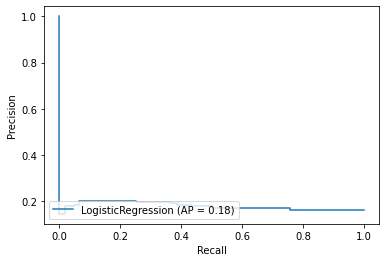

In [51]:
plot_precision_recall_curve(model, X_test, y_test)

In [52]:
model.predict_proba(X_test)

array([[0.9984314 , 0.0015686 ],
       [0.99838805, 0.00161195],
       [0.84168524, 0.15831476],
       ...,
       [0.85251732, 0.14748268],
       [0.99771901, 0.00228099],
       [0.99775523, 0.00224477]])

Add invited by and login after signup boolean columns:

In [53]:
model.coef_

array([[ 0.08366186,  0.02730904,  0.2179951 , -0.15714818,  0.17913638,
        -0.10368461, -0.13651838,  0.06084692,  4.70152068]])

In [54]:
X.columns

Index(['opted_in_to_mailing_list', 'enabled_for_marketing_drip',
       'creation_source_GUEST_INVITE', 'creation_source_ORG_INVITE',
       'creation_source_PERSONAL_PROJECTS', 'creation_source_SIGNUP',
       'creation_source_SIGNUP_GOOGLE_AUTH', 'invited', 'login_after_signup'],
      dtype='object')

In [57]:
df = pd.DataFrame({'feature':X.columns.values,'coefficient':model.coef_[0]})
df

,feature,coefficient
0,opted_in_to_mailing_list,0.083662
1,enabled_for_marketing_drip,0.027309
2,creation_source_GUEST_INVITE,0.217995
3,creation_source_ORG_INVITE,-0.157148
4,creation_source_PERSONAL_PROJECTS,0.179136
5,creation_source_SIGNUP,-0.103685
6,creation_source_SIGNUP_GOOGLE_AUTH,-0.136518
7,invited,0.060847
8,login_after_signup,4.701521


In [36]:
X.login_after_signup.value_counts()

1    8823
0    3177
Name: login_after_signup, dtype: int64

In [37]:
users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,retained
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,1
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,0


In [38]:
org_retention = users.groupby('org_id').agg({'retained':'sum','object_id':'count'})
org_retention.sort_values(by='retained',ascending = False).head(20)

,retained,object_id
org_id,,
7,16,119
1,14,233
2,13,201
3,13,168
13,13,72
9,13,124
62,12,39
0,11,319
4,11,159


In [58]:
from sklearn.neighbors import KNeighborsClassifier

In [59]:
knn = KNeighborsClassifier()
model = knn.fit(X_train,y_train)
model.score(X_test,y_test)

0.7453333333333333

In [60]:
confusion_matrix(y_test,model.predict(X_test))

array([[2142,  493],
       [ 271,   94]], dtype=int64)

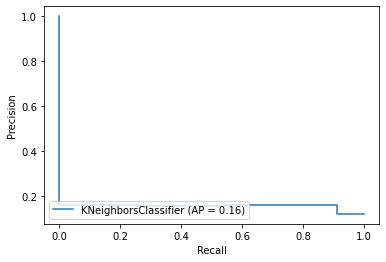

In [61]:
plot_precision_recall_curve(model, X_test, y_test)

In [42]:
from sklearn.ensemble import RandomForestClassifier

In [43]:
rf = RandomForestClassifier()
model = rf.fit(X_train,y_train)
model.score(X_test,y_test)

0.8783333333333333

In [44]:
confusion_matrix(y_test,model.predict(X_test))

array([[2635,    0],
       [ 365,    0]], dtype=int64)